In [9]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from spacy.lang.en import English

# 1. Análisis de Spacy

In [7]:
text ='London is the capital and largest city of England and the United Kingdom. Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, London has been a major settlement for two millennia. Londinium was founded by the Romans. The City of London, London’s ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile − retains boundaries that follow closely its medieval limits.The City of Westminster is also an Inner London borough holding city status. Greater London is governed by the Mayor of London and the London Assembly.London is located in the southeast of England.Westminster is located in London.London is the biggest city in Britain. London has a population of 7,172,036.'

In [6]:
spc = spacy.load('en_core_web_sm')

In [7]:
doc = spc(text)

In [8]:
print('Noun phrases:',[chunk.text for chunk in doc.noun_chunks])

Noun phrases: ['London', 'the capital', 'largest city', 'England', 'the United Kingdom', 'the River Thames', 'the south-east', 'England', 'the head', 'the North Sea', 'London', 'a major settlement', 'two millennia', 'Londinium', 'the Romans', 'The City', 'London', 'London', 'ancient core', 'an area', 'just 1.12 square miles', '2.9 km2', 'the Square Mile −', 'boundaries', 'its medieval limits', 'The City', 'Westminster', 'an Inner London borough holding city status', 'Greater London', 'the Mayor', 'London', 'the London Assembly', 'London', 'the southeast', 'England', 'Westminster', 'London', 'London', 'the biggest city', 'Britain', 'London', 'a population']


In [9]:
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Verbs: ['stand', 'lead', 'found', 'know', 'retain', 'follow', 'hold', 'govern', 'locate', 'locate']


In [10]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

London GPE
England GPE
the United Kingdom GPE
the River Thames ORG
England GPE
50-mile MONEY
80 km QUANTITY
the North Sea LOC
London GPE
two millennia DATE
Romans NORP
The City of London GPE
London GPE
− PERSON
just 1.12 square miles QUANTITY
2.9 km2 QUANTITY
Square Mile − LOC
The City of Westminster GPE
Inner NORP
London GPE
Greater London PERSON
the Mayor of London ORG
the London Assembly ORG
London GPE
England GPE
London GPE
London GPE
Britain GPE
London GPE
7,172,036 CARDINAL


In [ ]:
spacy.displacy.serve(doc, style='dep')

/home/jennifer/insaite/virtual_envs/AI_Recruitment_venv/lib/python3.8/site-packages/spacy/displacy/__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



# 2. Funciones

In [4]:
def getSentences(text):
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]
def printToken(token):
    print(token.text, "->", token.dep_)
    
def appendChunk(original, chunk):
    return original + ' ' + chunk

In [10]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

In [15]:
sentences = getSentences(text)
nlp_model = spacy.load('en_core_web_sm')

In [16]:
triples = []

In [17]:
print(text)

London is the capital and largest city of England and the United Kingdom. Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, London has been a major settlement for two millennia. Londinium was founded by the Romans. The City of London, London’s ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile − retains boundaries that follow closely its medieval limits.The City of Westminster is also an Inner London borough holding city status. Greater London is governed by the Mayor of London and the London Assembly.London is located in the southeast of England.Westminster is located in London.London is the biggest city in Britain. London has a population of 7,172,036.


In [18]:
for sentence in sentences:
    triples.append(processSentence(sentence))

London -> nsubj
is -> ROOT
the -> det
capital -> attr
and -> cc
largest -> amod
city -> conj
of -> prep
England -> pobj
and -> cc
the -> det
United -> compound
Kingdom -> conj
. -> punct
London , be capital large , England
Standing -> advcl
on -> prep
the -> det
River -> compound
Thames -> pobj
in -> prep
the -> det
south -> compound
- -> punct
east -> pobj
of -> prep
England -> pobj
, -> punct
at -> prep
the -> det
head -> pobj
of -> prep
its -> poss
50-mile -> amod
( -> punct
80 -> nummod
km -> nmod
) -> punct
estuary -> pobj
leading -> acl
to -> prep
the -> det
North -> compound
Sea -> pobj
, -> punct
London -> nsubj
has -> aux
been -> ROOT
a -> det
major -> amod
settlement -> attr
for -> prep
two -> nummod
millennia -> pobj
. -> punct
London , 50-mile be major settlement , Thames east England head estuary Sea millennia
Londinium -> nsubjpass
was -> auxpass
founded -> ROOT
by -> agent
the -> det
Romans -> pobj
. -> punct
Londinium , found by , Romans
The -> det
City -> nsubj
of -> p

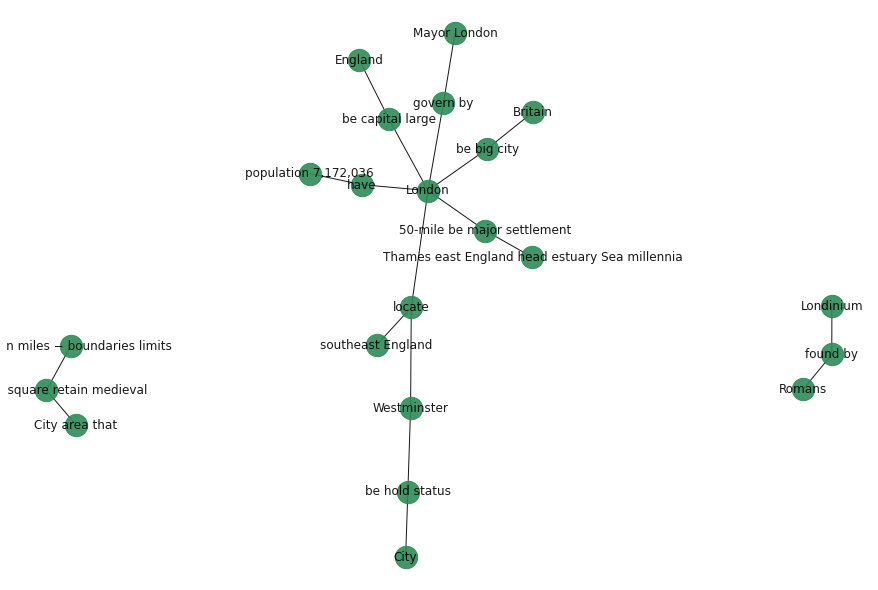

In [26]:
plt.rcParams['figure.figsize'] = [12, 8]
printGraph(triples)

# Replicar para 3 textos diferentes 